# Import Libraries 📚

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix
from imblearn.over_sampling import SMOTE,RandomOverSampler
warnings.filterwarnings('ignore')

# Dataset Information ℹ️


In [54]:
df = pd.read_csv("Lung Cancer Dataset.csv")
df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,NO
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,YES
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,NO
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,YES
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,YES


# 🔑 Các Đặc Trưng Chính:
Giới tính (GENDER): Giới tính của người tham gia khảo sát (1: Nam, 0: Nữ).

Tuổi (AGE): Tuổi của người tham gia khảo sát.

Hút thuốc (SMOKING): Thói quen hút thuốc (1: Có, 0: Không).

Ngón tay bị đổi màu (FINGER_DISCOLORATION): Biểu hiện ngón tay vàng hoặc đổi màu do hút thuốc nhiều.

Căng thẳng tinh thần (MENTAL_STRESS): Tình trạng bị stress hoặc áp lực tâm lý.

Tiếp xúc với ô nhiễm (EXPOSURE_TO_POLLUTION): Mức độ tiếp xúc với không khí ô nhiễm (1: Có, 0: Không).

Bệnh mãn tính (LONG_TERM_ILLNESS): Có tiền sử mắc bệnh lâu dài (1: Có, 0: Không).

Mức năng lượng (ENERGY_LEVEL): Đánh giá mức năng lượng tổng thể của cơ thể (dưới dạng số thực).

Hệ miễn dịch yếu (IMMUNE_WEAKNESS): Tình trạng miễn dịch yếu (1: Có, 0: Không).

Khó thở (BREATHING_ISSUE): Triệu chứng thở khó, thở ngắn (1: Có, 0: Không).

Sử dụng rượu bia (ALCOHOL_CONSUMPTION): Có uống rượu/bia thường xuyên (1: Có, 0: Không).

Đau họng (THROAT_DISCOMFORT): Có cảm giác đau hoặc khó chịu ở vùng họng (1: Có, 0: Không).

Độ bão hòa oxy (OXYGEN_SATURATION): Nồng độ oxy trong máu (%).

Đau tức ngực (CHEST_TIGHTNESS): Có triệu chứng đau hoặc tức vùng ngực (1: Có, 0: Không).

Tiền sử gia đình (FAMILY_HISTORY): Gia đình có người từng mắc bệnh phổi (1: Có, 0: Không).

Gia đình hút thuốc (SMOKING_FAMILY_HISTORY): Gia đình có người hút thuốc (1: Có, 0: Không).

Suy giảm miễn dịch do stress (STRESS_IMMUNE): Ảnh hưởng tiêu cực của stress đến hệ miễn dịch (1: Có, 0: Không).

# 🎯 Biến Mục Tiêu: Khả năng mắc bệnh phổi (PULMONARY_DISEASE)
YES: Người này có khả năng cao mắc bệnh phổi.

NO: Không có dấu hiệu đáng kể liên quan đến bệnh phổi.

In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,5000.0,57.222800,15.799224,30.000000,44.000000,57.000000,71.000000,84.000000
GENDER,5000.0,0.501200,0.500049,0.000000,0.000000,1.000000,1.000000,1.000000
SMOKING,5000.0,0.666400,0.471546,0.000000,0.000000,1.000000,1.000000,1.000000
FINGER_DISCOLORATION,5000.0,0.601200,0.489700,0.000000,0.000000,1.000000,1.000000,1.000000
MENTAL_STRESS,5000.0,0.539800,0.498463,0.000000,0.000000,1.000000,1.000000,1.000000
EXPOSURE_TO_POLLUTION,5000.0,0.516000,0.499794,0.000000,0.000000,1.000000,1.000000,1.000000
LONG_TERM_ILLNESS,5000.0,0.439200,0.496339,0.000000,0.000000,0.000000,1.000000,1.000000
ENERGY_LEVEL,5000.0,55.032043,7.913083,23.258308,49.440685,55.050421,60.323320,83.046971
IMMUNE_WEAKNESS,5000.0,0.394800,0.488857,0.000000,0.000000,0.000000,1.000000,1.000000
BREATHING_ISSUE,5000.0,0.800400,0.399740,0.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   AGE                     5000 non-null   int64  
 1   GENDER                  5000 non-null   int64  
 2   SMOKING                 5000 non-null   int64  
 3   FINGER_DISCOLORATION    5000 non-null   int64  
 4   MENTAL_STRESS           5000 non-null   int64  
 5   EXPOSURE_TO_POLLUTION   5000 non-null   int64  
 6   LONG_TERM_ILLNESS       5000 non-null   int64  
 7   ENERGY_LEVEL            5000 non-null   float64
 8   IMMUNE_WEAKNESS         5000 non-null   int64  
 9   BREATHING_ISSUE         5000 non-null   int64  
 10  ALCOHOL_CONSUMPTION     5000 non-null   int64  
 11  THROAT_DISCOMFORT       5000 non-null   int64  
 12  OXYGEN_SATURATION       5000 non-null   float64
 13  CHEST_TIGHTNESS         5000 non-null   int64  
 14  FAMILY_HISTORY          5000 non-null   

In [57]:
label_encode = LabelEncoder()
df["PULMONARY_DISEASE"] = label_encode.fit_transform(df["PULMONARY_DISEASE"])

df.head()

,AGE,GENDER,SMOKING,FINGER_DISCOLORATION,MENTAL_STRESS,EXPOSURE_TO_POLLUTION,LONG_TERM_ILLNESS,ENERGY_LEVEL,IMMUNE_WEAKNESS,BREATHING_ISSUE,ALCOHOL_CONSUMPTION,THROAT_DISCOMFORT,OXYGEN_SATURATION,CHEST_TIGHTNESS,FAMILY_HISTORY,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE,PULMONARY_DISEASE
0,68,1,1,1,1,1,0,57.831178,0,0,1,1,95.977287,1,0,0,0,0
1,81,1,1,0,0,1,1,47.694835,1,1,0,1,97.184483,0,0,0,0,1
2,58,1,1,0,0,0,0,59.577435,0,1,1,0,94.974939,0,0,0,0,0
3,44,0,1,0,1,1,0,59.785767,0,1,0,1,95.187900,0,0,0,0,1
4,72,0,1,1,1,1,1,59.733941,0,1,0,1,93.503008,0,0,0,0,1


# Exploratoty Data Analysis (EDA) 📊

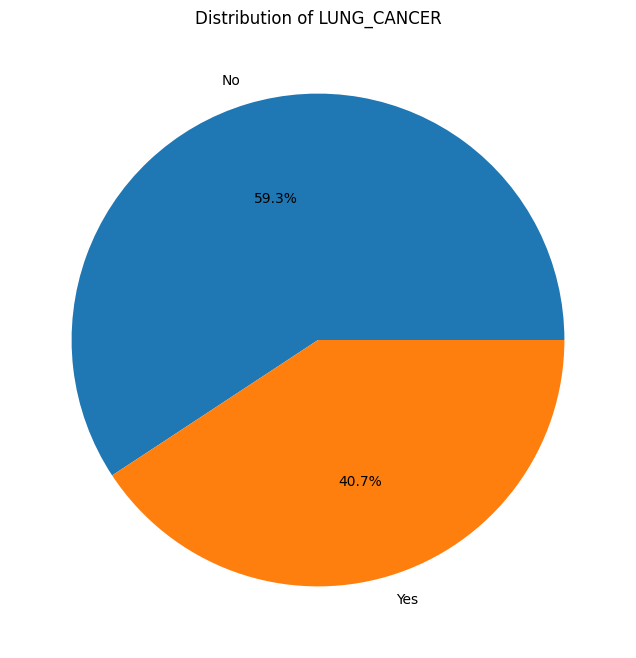

In [58]:
target = df["PULMONARY_DISEASE"].value_counts()
labels = ['No' if i == 0 else 'Yes' for i in target.index]
plt.figure(figsize=(8,8))
plt.pie(target, labels= labels,autopct='%1.1f%%')
plt.title('Distribution of LUNG_CANCER')
plt.show()

<!-- # Training Machine Learning Models 🤖 -->

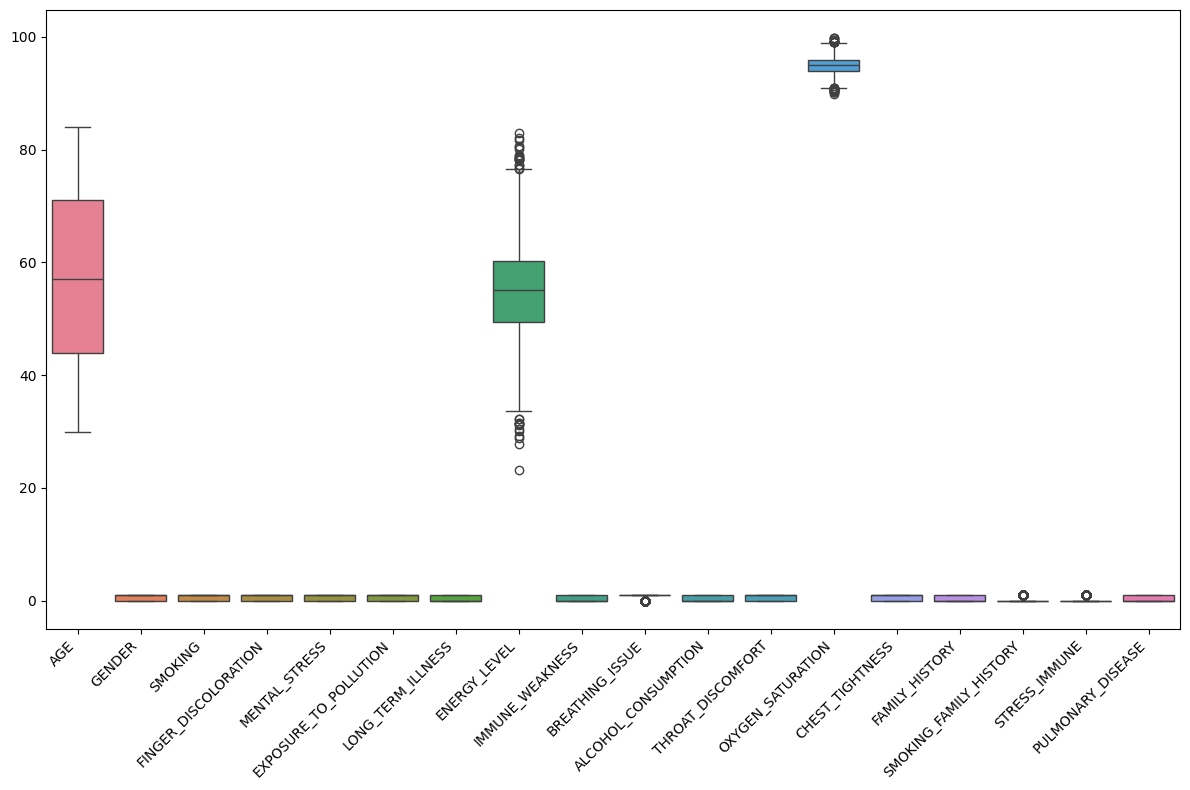

In [59]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

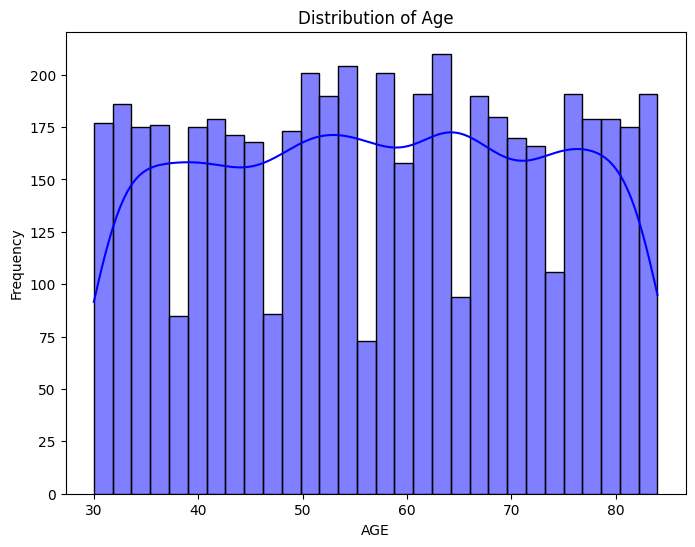

In [60]:
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.ylabel('Frequency')
plt.show()

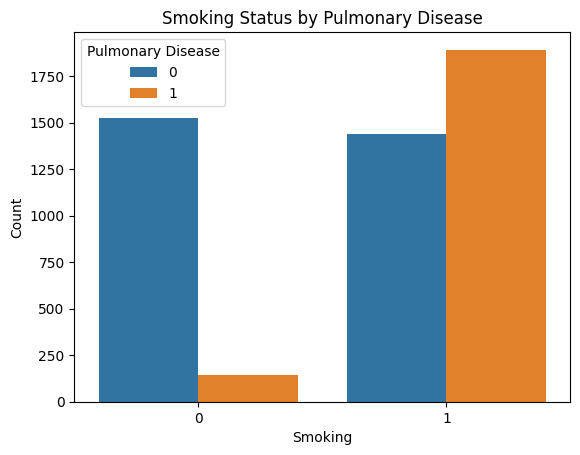

In [61]:
sns.countplot(x='SMOKING', hue='PULMONARY_DISEASE', data=df)
plt.title('Smoking Status by Pulmonary Disease')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Pulmonary Disease')
plt.show()

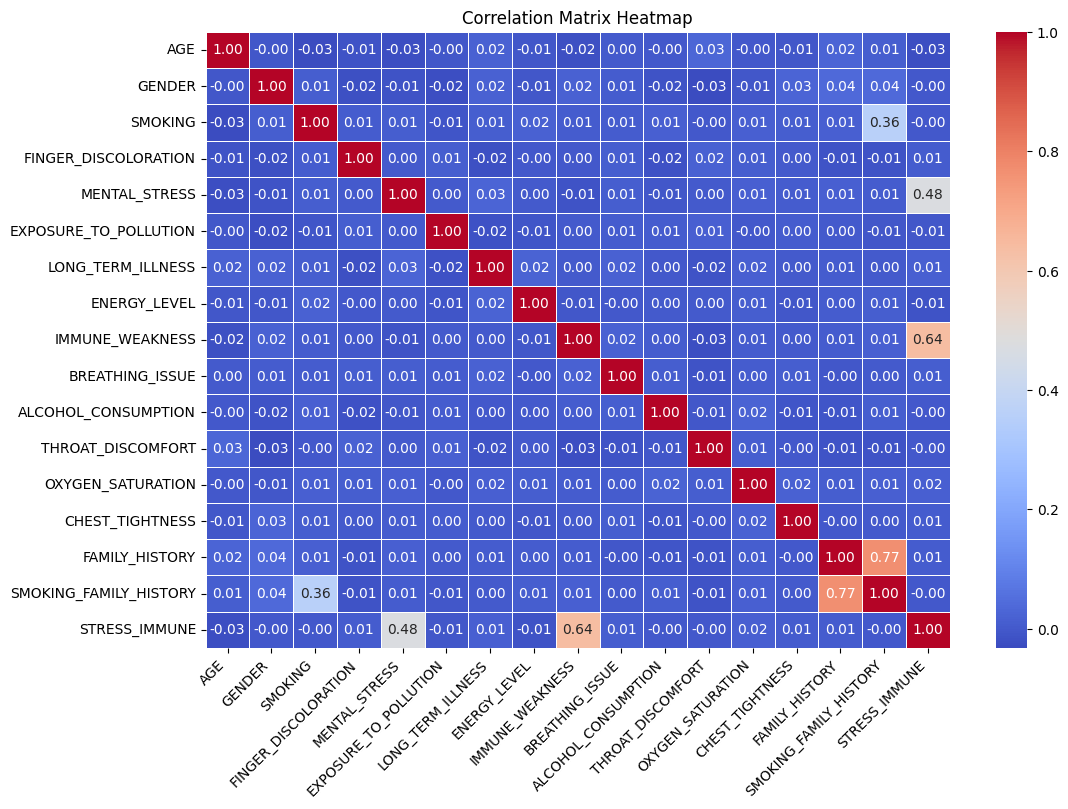

In [62]:
correlation_matrix = df.drop(columns="PULMONARY_DISEASE").corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.xticks(rotation=45, ha="right")
plt.title('Correlation Matrix Heatmap')
plt.show()

# BaseLine Models 🤖

In [63]:
X = df.drop(columns="PULMONARY_DISEASE")
y = df["PULMONARY_DISEASE"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [64]:
models={
    "Logistic Regression": LogisticRegression(),
    "DecisionTree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbor": KNeighborsClassifier(),
    "Bayes": GaussianNB(),
    "Support Vector Machine": SVC(),
    "XBboost": XGBClassifier(),
}

In [65]:
for name, model in models.items():
    # Huấn luyện mô hình
    model.fit(X_train, y_train)
    
    # Đánh giá trên tập TRAIN
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    
    # Đánh giá trên tập TEST
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # In kết quả chi tiết
    print(f"Model: {name}")
    print(f"  TRAIN | Accuracy: {train_accuracy:.2f}% | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1-Score: {train_f1:.4f}")
    print(f"  TEST  | Accuracy: {test_accuracy:.2f}% | Precision: {test_precision:.4f} | Recall: {test_recall:.4f} | F1-Score: {test_f1:.4f}")
    print(f"  Difference (Train - Test) | Accuracy: {train_accuracy - test_accuracy:.2f}% | Precision: {train_precision - test_precision:.4f} | Recall: {train_recall - test_recall:.4f} | F1-Score: {train_f1 - test_f1:.4f}")
    print("-" * 80)

Model: Logistic Regression
  TRAIN | Accuracy: 89.40% | Precision: 0.8623 | Recall: 0.8861 | F1-Score: 0.8740
  TEST  | Accuracy: 89.30% | Precision: 0.8409 | Recall: 0.8833 | F1-Score: 0.8616
  Difference (Train - Test) | Accuracy: 0.10% | Precision: 0.0213 | Recall: 0.0029 | F1-Score: 0.0125
--------------------------------------------------------------------------------
Model: DecisionTree
  TRAIN | Accuracy: 100.00% | Precision: 1.0000 | Recall: 1.0000 | F1-Score: 1.0000
  TEST  | Accuracy: 84.10% | Precision: 0.8062 | Recall: 0.7613 | F1-Score: 0.7831
  Difference (Train - Test) | Accuracy: 15.90% | Precision: 0.1938 | Recall: 0.2387 | F1-Score: 0.2169
--------------------------------------------------------------------------------
Model: Random Forest
  TRAIN | Accuracy: 100.00% | Precision: 1.0000 | Recall: 1.0000 | F1-Score: 1.0000
  TEST  | Accuracy: 91.00% | Precision: 0.8932 | Recall: 0.8647 | F1-Score: 0.8787
  Difference (Train - Test) | Accuracy: 9.00% | Precision: 0.1068

Accuracy: 0.917
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93       623
           1       0.90      0.88      0.89       377

    accuracy                           0.92      1000
   macro avg       0.91      0.91      0.91      1000
weighted avg       0.92      0.92      0.92      1000



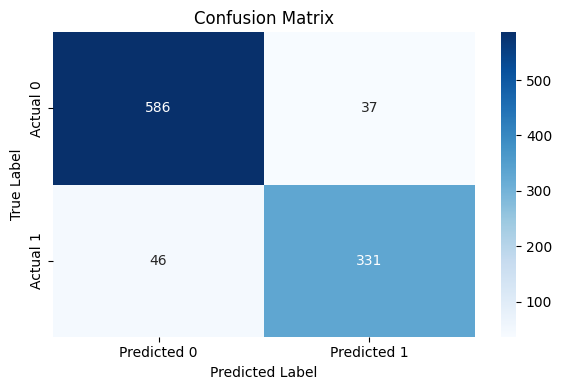

In [66]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Data Preproccessing 🧹

In [67]:
# Check null data
df.isnull().sum()

AGE                       0
GENDER                    0
SMOKING                   0
FINGER_DISCOLORATION      0
MENTAL_STRESS             0
EXPOSURE_TO_POLLUTION     0
LONG_TERM_ILLNESS         0
ENERGY_LEVEL              0
IMMUNE_WEAKNESS           0
BREATHING_ISSUE           0
ALCOHOL_CONSUMPTION       0
THROAT_DISCOMFORT         0
OXYGEN_SATURATION         0
CHEST_TIGHTNESS           0
FAMILY_HISTORY            0
SMOKING_FAMILY_HISTORY    0
STRESS_IMMUNE             0
PULMONARY_DISEASE         0
dtype: int64

In [68]:
# Check duplicated data
df.duplicated().sum()

np.int64(0)

# Handling Outlier Data

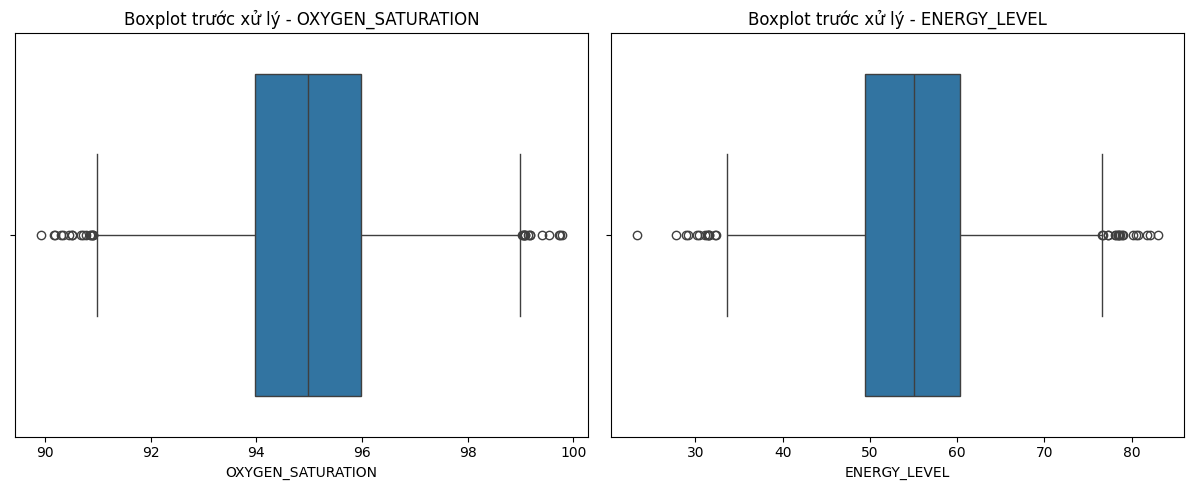

Số lượng bản ghi sau khi loại bỏ ngoại lai: 4939


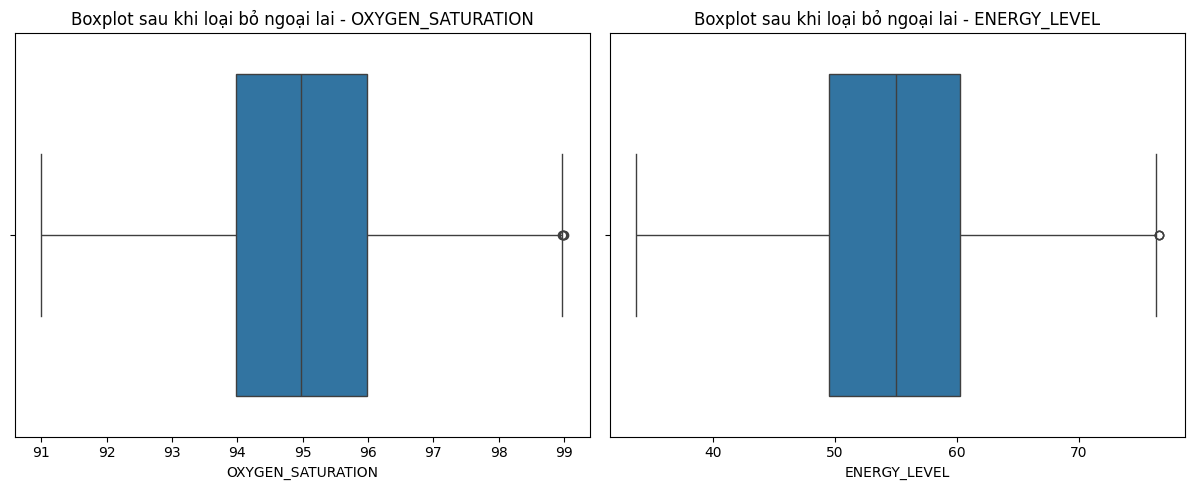

In [69]:
cols = ['OXYGEN_SATURATION', 'ENERGY_LEVEL']

plt.figure(figsize=(18, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot trước xử lý - {col}')
plt.tight_layout()
plt.show()

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print(f"Số lượng bản ghi sau khi loại bỏ ngoại lai: {len(df)}")

# Vẽ boxplot sau loại bỏ ngoại lai - dàn hàng ngang
plt.figure(figsize=(18, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot sau khi loại bỏ ngoại lai - {col}')
plt.tight_layout()
plt.show()


# Feature Selection

Mức độ quan trọng của các đặc trưng:
                   Feature  Importance
2                  SMOKING    0.193266
7             ENERGY_LEVEL    0.158784
11       THROAT_DISCOMFORT    0.115691
9          BREATHING_ISSUE    0.101805
12       OXYGEN_SATURATION    0.098115
0                      AGE    0.085232
15  SMOKING_FAMILY_HISTORY    0.050222
16           STRESS_IMMUNE    0.034735
5    EXPOSURE_TO_POLLUTION    0.029670
14          FAMILY_HISTORY    0.021185
8          IMMUNE_WEAKNESS    0.018259
6        LONG_TERM_ILLNESS    0.016140
4            MENTAL_STRESS    0.016031
3     FINGER_DISCOLORATION    0.015450
10     ALCOHOL_CONSUMPTION    0.015317
13         CHEST_TIGHTNESS    0.015168
1                   GENDER    0.014930


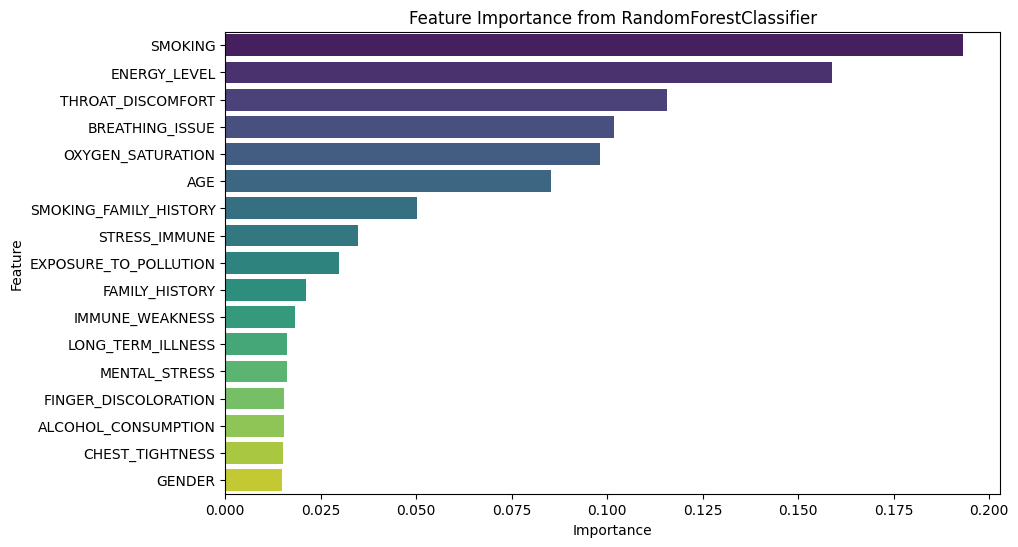

In [70]:
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

# Lấy mức độ quan trọng của các đặc trưng
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Tạo DataFrame để hiển thị mức độ quan trọng
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

# In ra các đặc trưng quan trọng
print("Mức độ quan trọng của các đặc trưng:")
print(importance_df)

# Trực quan hóa mức độ quan trọng của các đặc trưng
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance from RandomForestClassifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Data Split

In [71]:
columns_to_drop = [
    "PULMONARY_DISEASE",
    "GENDER",
    "CHEST_TIGHTNESS",
    "ALCOHOL_CONSUMPTION",
    "FINGER_DISCOLORATION",
    "MENTAL_STRESS",
    "LONG_TERM_ILLNESS",
    "IMMUNE_WEAKNESS",
    "FAMILY_HISTORY"
]
X = df.drop(columns=columns_to_drop)
y = df["PULMONARY_DISEASE"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,AGE,SMOKING,EXPOSURE_TO_POLLUTION,ENERGY_LEVEL,BREATHING_ISSUE,THROAT_DISCOMFORT,OXYGEN_SATURATION,SMOKING_FAMILY_HISTORY,STRESS_IMMUNE
2265,35,1,1,68.442800,1,1,93.510972,1,0
1130,66,1,0,57.370063,1,1,94.843254,0,0
4680,57,0,0,50.147466,1,0,95.858824,0,0
1974,82,0,0,34.225550,1,1,94.188979,0,1
1567,52,1,0,55.064677,1,1,95.530578,0,0


# Label Balancing

Smote

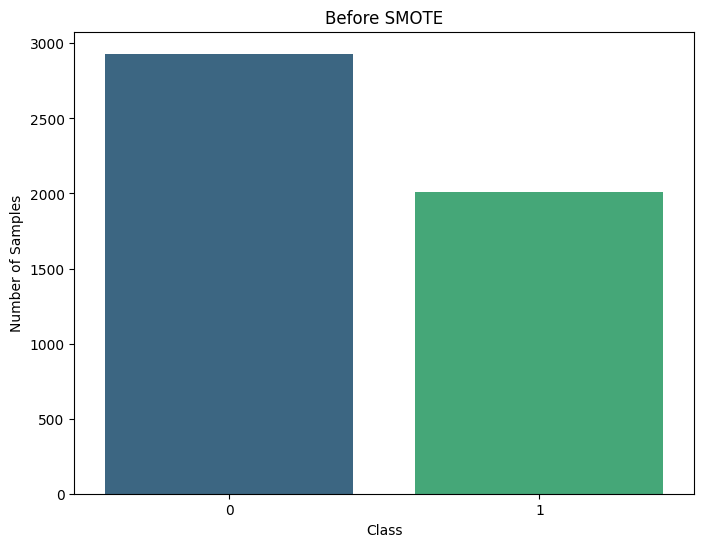

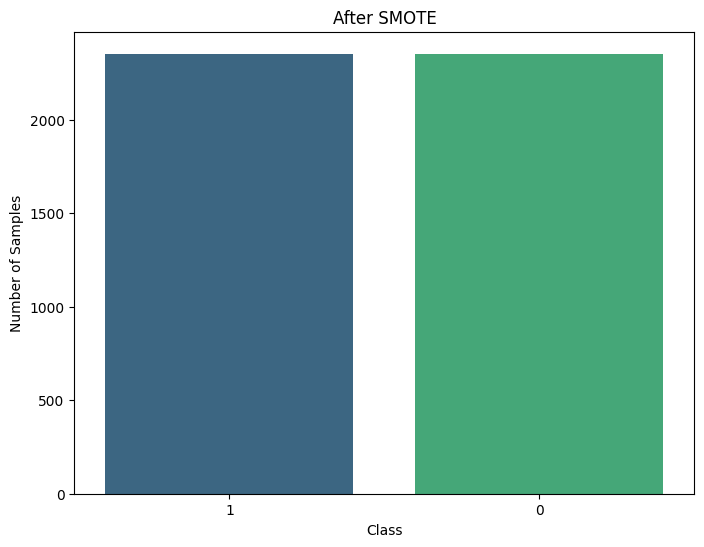

In [72]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Hàm hiển thị biểu đồ phân phối nhãn
def plot_class_distribution(y_data, title):
    class_distribution = pd.Series(y_data).value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=class_distribution.index.astype(str),  # để nhãn là chuỗi
                y=class_distribution.values, palette='viridis')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()

# Vẽ biểu đồ trước và sau khi cân bằng
plot_class_distribution(y, title='Before SMOTE')
plot_class_distribution(y_train_smote, title='After SMOTE')


Random Over Sampler

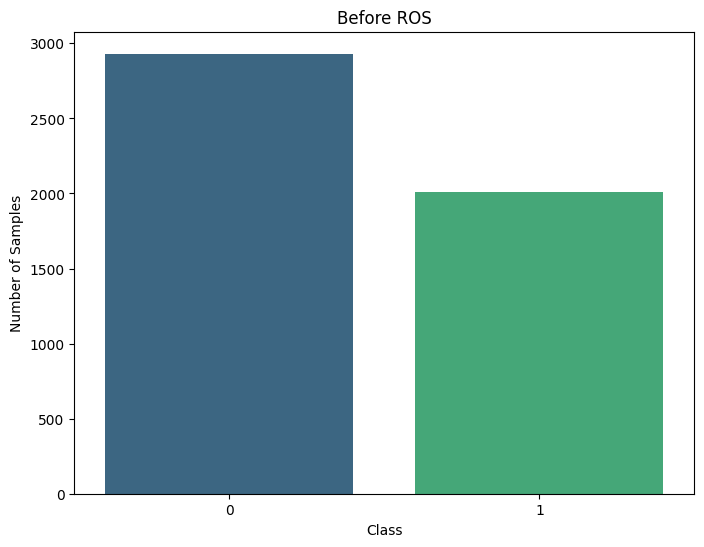

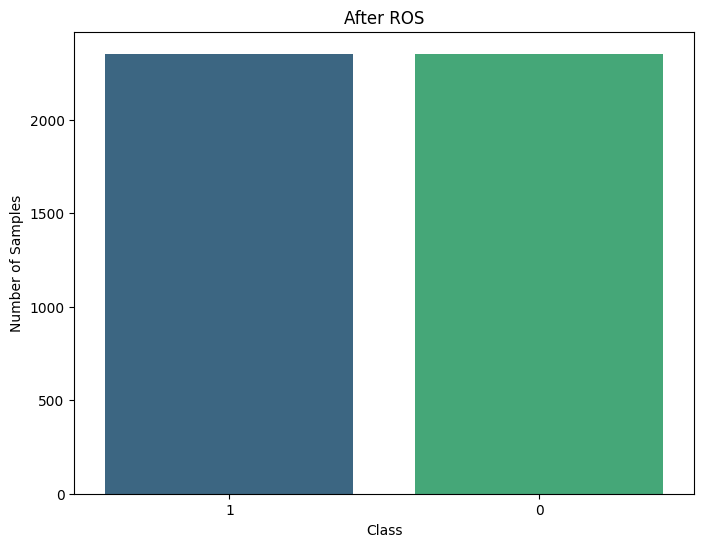

In [73]:
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Hàm hiển thị biểu đồ phân phối nhãn
def plot_class_distribution(y_data, title):
    class_distribution = pd.Series(y_data).value_counts()

    plt.figure(figsize=(8, 6))
    sns.barplot(x=class_distribution.index.astype(str),  # để nhãn là chuỗi
                y=class_distribution.values, palette='viridis')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Number of Samples')
    plt.show()

# Vẽ biểu đồ trước và sau khi cân bằng
plot_class_distribution(y, title='Before ROS')
plot_class_distribution(y_train_ros, title='After ROS')

# Scaling Data

Min-Max Scaler

Saved scaler to scaler.pkl


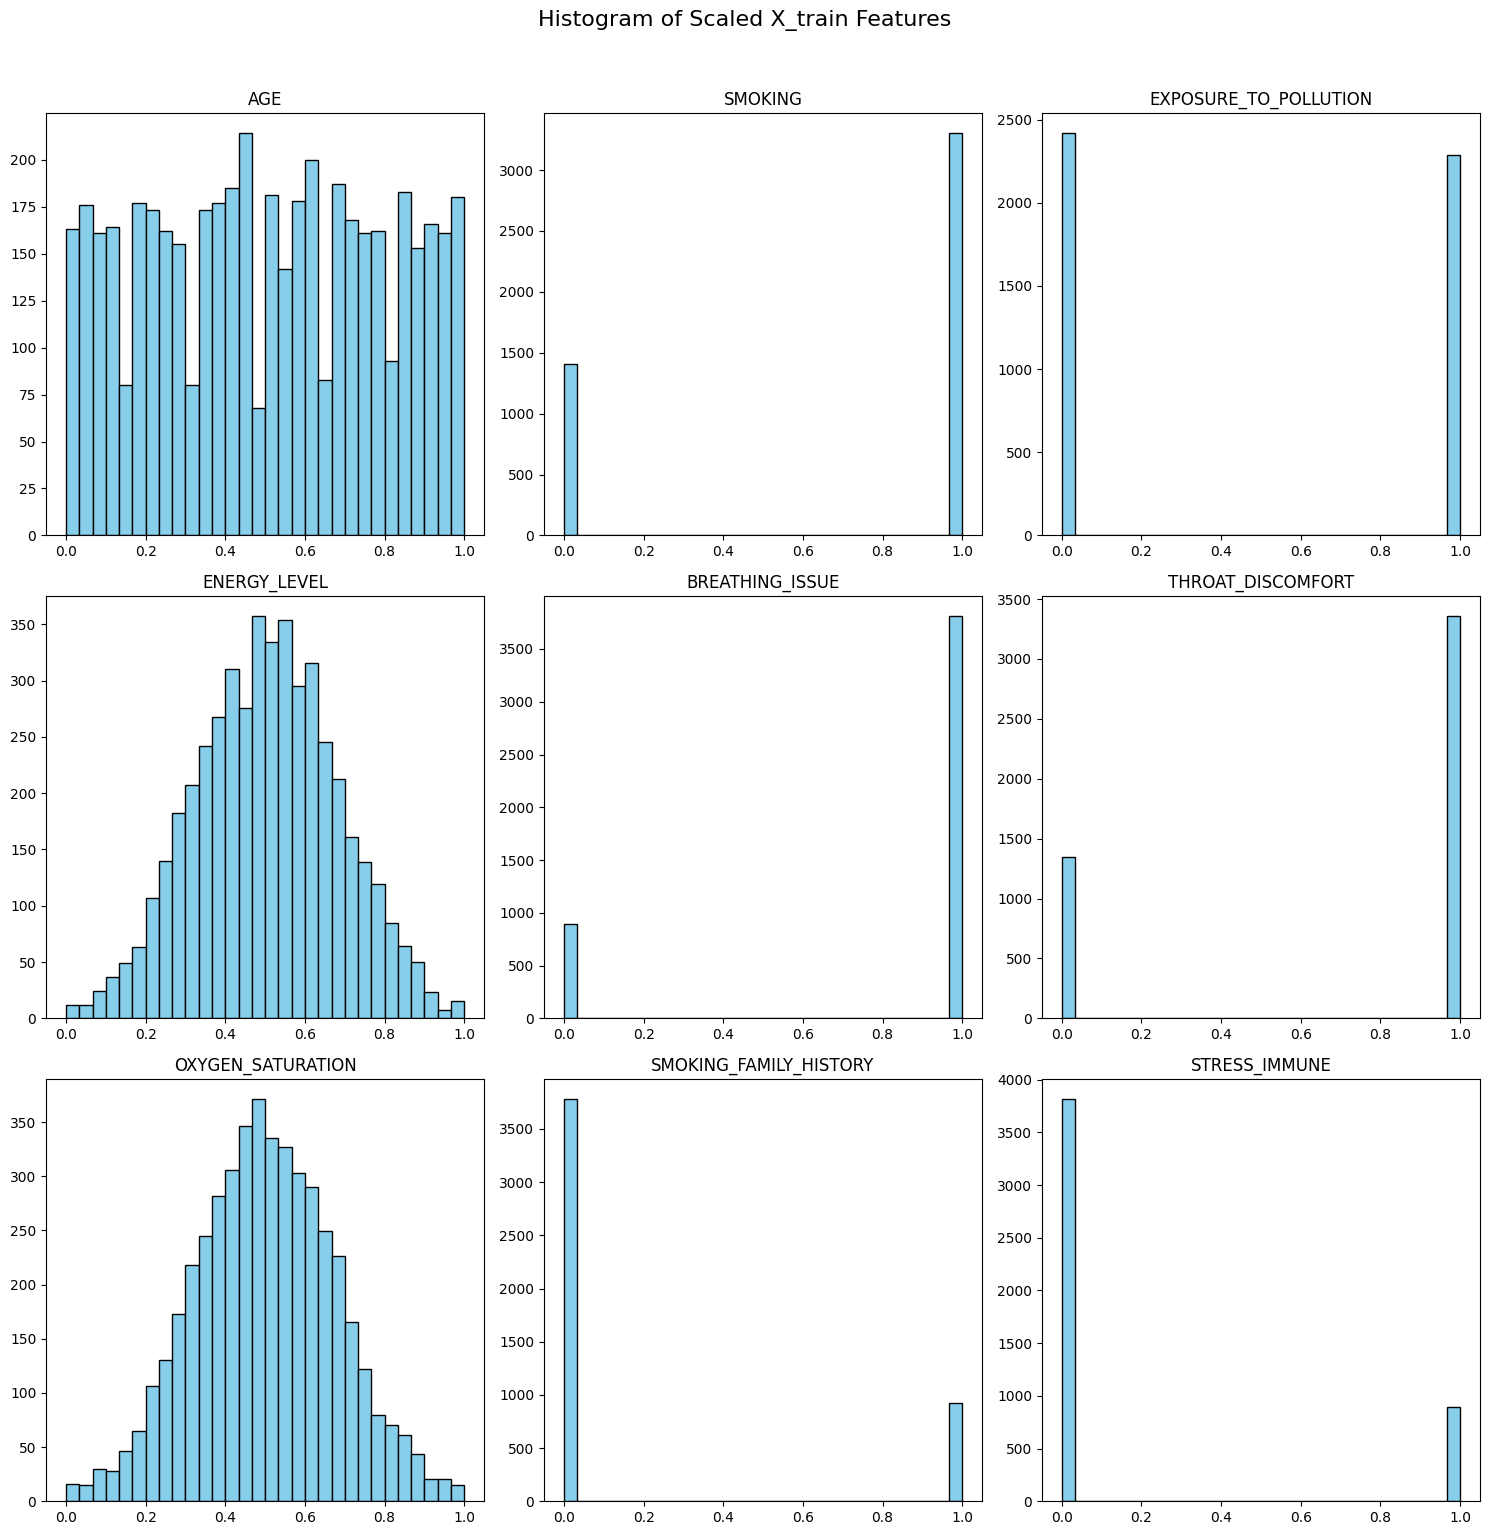

In [74]:
import pandas as pd
import numpy as np
import joblib
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

def Min_Max_scale_data(X_train, X_test):
    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    return X_train_scaled, X_test_scaled, scaler  # Thêm scaler vào giá trị trả về

# Chuẩn hóa dữ liệu cho SMOTE và ROS
X_train_SMOTE_scaled, X_test_SMOTE_scaled, scaler_smote = Min_Max_scale_data(X_train_smote, X_test)
X_train_ROS_scaled, X_test_ROS_scaled, scaler_ros = Min_Max_scale_data(X_train_ros, X_test)

# Lưu scaler (chọn scaler_ros hoặc scaler_smote, tùy theo cái bạn muốn dùng trong Deploy.py)
joblib.dump(scaler_ros, 'scaler.pkl')
print("Saved scaler to scaler.pkl")

# Tạo DataFrame từ dữ liệu đã chuẩn hóa (dùng SMOTE làm ví dụ)
X_train_scaled_df = pd.DataFrame(X_train_SMOTE_scaled, columns=X.columns)

# Xác định số cột
n_cols = len(X_train_scaled_df.columns)

# Xác định số hàng cho subplot (3 biểu đồ mỗi hàng)
n_rows = (n_cols + 2) // 3

# Tạo figure
plt.figure(figsize=(15, 5 * n_rows))

# Vẽ histogram
for i, col in enumerate(X_train_scaled_df.columns):
    plt.subplot(n_rows, 3, i + 1)
    plt.hist(X_train_scaled_df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col)

# Bố cục
plt.suptitle('Histogram of Scaled X_train Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Training Models After Preproccessing 🤖

With Smote

In [75]:
for name, model in models.items():
    # Huấn luyện mô hình trên dữ liệu SMOTE đã scale
    model.fit(X_train_SMOTE_scaled, y_train_smote)
    
    # Dự đoán trên tập TRAIN (dữ liệu SMOTE đã scale)
    y_train_pred = model.predict(X_train_SMOTE_scaled)
    train_accuracy = accuracy_score(y_train_smote, y_train_pred) * 100
    train_precision = precision_score(y_train_smote, y_train_pred)
    train_recall = recall_score(y_train_smote, y_train_pred)
    train_f1 = f1_score(y_train_smote, y_train_pred)
    
    # Dự đoán trên tập TEST (dữ liệu test đã scale tương ứng)
    y_test_pred = model.predict(X_test_SMOTE_scaled)  # dùng X_test đã scale
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # In kết quả
    print(f"Model: {name}")
    print(f"  TRAIN | Accuracy: {train_accuracy:.2f}% | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1-Score: {train_f1:.4f}")
    print(f"  TEST  | Accuracy: {test_accuracy:.2f}% | Precision: {test_precision:.4f} | Recall: {test_recall:.4f} | F1-Score: {test_f1:.4f}")
    print(f"  Difference (Train - Test) | Accuracy: {train_accuracy - test_accuracy:.2f}% | Precision: {train_precision - test_precision:.4f} | Recall: {train_recall - test_recall:.4f} | F1-Score: {train_f1 - test_f1:.4f}")
    print("-" * 80)
    

Model: Logistic Regression
  TRAIN | Accuracy: 83.53% | Precision: 0.8205 | Recall: 0.8585 | F1-Score: 0.8390
  TEST  | Accuracy: 87.15% | Precision: 0.8017 | Recall: 0.9171 | F1-Score: 0.8555
  Difference (Train - Test) | Accuracy: -3.61% | Precision: 0.0188 | Recall: -0.0586 | F1-Score: -0.0165
--------------------------------------------------------------------------------
Model: DecisionTree
  TRAIN | Accuracy: 100.00% | Precision: 1.0000 | Recall: 1.0000 | F1-Score: 1.0000
  TEST  | Accuracy: 82.19% | Precision: 0.7522 | Recall: 0.8512 | F1-Score: 0.7986
  Difference (Train - Test) | Accuracy: 17.81% | Precision: 0.2478 | Recall: 0.1488 | F1-Score: 0.2014
--------------------------------------------------------------------------------
Model: Random Forest
  TRAIN | Accuracy: 100.00% | Precision: 1.0000 | Recall: 1.0000 | F1-Score: 1.0000
  TEST  | Accuracy: 90.28% | Precision: 0.8774 | Recall: 0.8902 | F1-Score: 0.8838
  Difference (Train - Test) | Accuracy: 9.72% | Precision: 0.1

With Random Over Sampler

In [76]:
for name, model in models.items():
    # Huấn luyện mô hình trên dữ liệu ROS đã scale
    model.fit(X_train_ROS_scaled, y_train_ros)
    
    # Dự đoán trên tập TRAIN (dữ liệu ROS đã scale)
    y_train_pred = model.predict(X_train_ROS_scaled)
    train_accuracy = accuracy_score(y_train_ros, y_train_pred) * 100
    train_precision = precision_score(y_train_ros, y_train_pred)
    train_recall = recall_score(y_train_ros, y_train_pred)
    train_f1 = f1_score(y_train_ros, y_train_pred)
    
    # Dự đoán trên tập TEST (dữ liệu test đã scale)
    y_test_pred = model.predict(X_test_ROS_scaled)  # X_test_ROS_scaled là X_test đã scale với scaler dùng trên ROS train
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    
    # In kết quả
    print(f"Model: {name}")
    print(f"  TRAIN | Accuracy: {train_accuracy:.2f}% | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1-Score: {train_f1:.4f}")
    print(f"  TEST  | Accuracy: {test_accuracy:.2f}% | Precision: {test_precision:.4f} | Recall: {test_recall:.4f} | F1-Score: {test_f1:.4f}")
    print(f"  Difference (Train - Test) | Accuracy: {train_accuracy - test_accuracy:.2f}% | Precision: {train_precision - test_precision:.4f} | Recall: {train_recall - test_recall:.4f} | F1-Score: {train_f1 - test_f1:.4f}")
    print("-" * 80)

Model: Logistic Regression
  TRAIN | Accuracy: 88.31% | Precision: 0.8602 | Recall: 0.9150 | F1-Score: 0.8867
  TEST  | Accuracy: 88.56% | Precision: 0.8249 | Recall: 0.9195 | F1-Score: 0.8697
  Difference (Train - Test) | Accuracy: -0.25% | Precision: 0.0352 | Recall: -0.0045 | F1-Score: 0.0171
--------------------------------------------------------------------------------
Model: DecisionTree
  TRAIN | Accuracy: 100.00% | Precision: 1.0000 | Recall: 1.0000 | F1-Score: 1.0000
  TEST  | Accuracy: 85.93% | Precision: 0.8362 | Recall: 0.8220 | F1-Score: 0.8290
  Difference (Train - Test) | Accuracy: 14.07% | Precision: 0.1638 | Recall: 0.1780 | F1-Score: 0.1710
--------------------------------------------------------------------------------
Model: Random Forest
  TRAIN | Accuracy: 100.00% | Precision: 1.0000 | Recall: 1.0000 | F1-Score: 1.0000
  TEST  | Accuracy: 91.19% | Precision: 0.8988 | Recall: 0.8878 | F1-Score: 0.8933
  Difference (Train - Test) | Accuracy: 8.81% | Precision: 0.10

# Hyperparameter Tuning ⚙️

In [77]:
models_with_params = {
    "DecisionTree": (
        DecisionTreeClassifier(),
        {
            'max_depth': [3, 5, 10, 15, 20, None],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 10],
            'criterion': ['gini', 'entropy']
        }
    ),
    "Random Forest": (
        RandomForestClassifier(),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [5, 10, 15, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'bootstrap': [True, False]
        }
    ),
    "K-Nearest Neighbor": (
        KNeighborsClassifier(),
        {
            'n_neighbors': [3, 5, 7, 9, 11],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
    ),
    "Bayes": (
        GaussianNB(),
        {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    ),
    "XGBoost": (
        XGBClassifier(eval_metric='logloss', use_label_encoder=False),
        {
            'n_estimators': [50, 100, 200],
            'max_depth': [3, 6, 10, 15],
            'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
            'subsample': [0.6, 0.8, 1.0],
            'colsample_bytree': [0.6, 0.8, 1.0]
        }
    ),
    "Logistic Regression": (
        LogisticRegression(max_iter=1000),
        {
            'C': [0.001, 0.01, 0.1, 1, 10, 20],
            'penalty': ['l1', 'l2'],
            'solver': ['lbfgs', 'liblinear', 'saga']
        }
    ),
    "SVM": (
        SVC(probability=True),
        {
            'C': [0.01, 0.1, 1, 10, 20],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
            'degree': [2, 3, 4]
        }
    )
}
for name, (model, params) in models_with_params.items():
    print(f"\nTuning hyperparameters for: {name}")

    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_SMOTE_scaled, y_train_smote)

    best_model = grid.best_estimator_

    # Predictions trên train và test
    y_train_pred = best_model.predict(X_train_SMOTE_scaled)
    y_test_pred = best_model.predict(X_test_SMOTE_scaled)

    # Train metrics
    train_accuracy = accuracy_score(y_train_smote, y_train_pred) * 100
    train_precision = precision_score(y_train_smote, y_train_pred)
    train_recall = recall_score(y_train_smote, y_train_pred)
    train_f1 = f1_score(y_train_smote, y_train_pred)

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f"Model: {name}")
    print(f"  TRAIN | Accuracy: {train_accuracy:.2f}% | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1-Score: {train_f1:.4f}")
    print(f"  TEST  | Accuracy: {test_accuracy:.2f}% | Precision: {test_precision:.4f} | Recall: {test_recall:.4f} | F1-Score: {test_f1:.4f}")
    print(f"  Difference (Train - Test) | Accuracy: {train_accuracy - test_accuracy:.2f}% | Precision: {train_precision - test_precision:.4f} | Recall: {train_recall - test_recall:.4f} | F1-Score: {train_f1 - test_f1:.4f}")
    print("-" * 80)


Tuning hyperparameters for: DecisionTree
Model: DecisionTree
  TRAIN | Accuracy: 88.50% | Precision: 0.9030 | Recall: 0.8627 | F1-Score: 0.8824
  TEST  | Accuracy: 87.65% | Precision: 0.8288 | Recall: 0.8854 | F1-Score: 0.8561
  Difference (Train - Test) | Accuracy: 0.85% | Precision: 0.0743 | Recall: -0.0226 | F1-Score: 0.0263
--------------------------------------------------------------------------------

Tuning hyperparameters for: Random Forest
Model: Random Forest
  TRAIN | Accuracy: 100.00% | Precision: 1.0000 | Recall: 1.0000 | F1-Score: 1.0000
  TEST  | Accuracy: 90.18% | Precision: 0.8753 | Recall: 0.8902 | F1-Score: 0.8827
  Difference (Train - Test) | Accuracy: 9.82% | Precision: 0.1247 | Recall: 0.1098 | F1-Score: 0.1173
--------------------------------------------------------------------------------

Tuning hyperparameters for: K-Nearest Neighbor
Model: K-Nearest Neighbor
  TRAIN | Accuracy: 100.00% | Precision: 1.0000 | Recall: 1.0000 | F1-Score: 1.0000
  TEST  | Accura

In [78]:
for name, (model, params) in models_with_params.items():
    print(f"\nTuning hyperparameters for: {name}")

    grid = GridSearchCV(model, params, cv=5, scoring='f1', n_jobs=-1)
    grid.fit(X_train_ROS_scaled, y_train_ros)

    best_model = grid.best_estimator_

    filename = f"{name.replace(' ', '_')}_best_model.pkl"
    joblib.dump(best_model, filename)
    print(f"Saved best model for {name} to {filename}")

    # Predictions trên train và test
    y_train_pred = best_model.predict(X_train_ROS_scaled)
    y_test_pred = best_model.predict(X_test_ROS_scaled)

    # Train metrics
    train_accuracy = accuracy_score(y_train_ros, y_train_pred) * 100
    train_precision = precision_score(y_train_ros, y_train_pred)
    train_recall = recall_score(y_train_ros, y_train_pred)
    train_f1 = f1_score(y_train_ros, y_train_pred)

    # Test metrics
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)

    print(f"Model: {name}")
    print(f"  TRAIN | Accuracy: {train_accuracy:.2f}% | Precision: {train_precision:.4f} | Recall: {train_recall:.4f} | F1-Score: {train_f1:.4f}")
    print(f"  TEST  | Accuracy: {test_accuracy:.2f}% | Precision: {test_precision:.4f} | Recall: {test_recall:.4f} | F1-Score: {test_f1:.4f}")
    print(f"  Difference (Train - Test) | Accuracy: {train_accuracy - test_accuracy:.2f}% | Precision: {train_precision - test_precision:.4f} | Recall: {train_recall - test_recall:.4f} | F1-Score: {train_f1 - test_f1:.4f}")
    print("-" * 80)


Tuning hyperparameters for: DecisionTree
Saved best model for DecisionTree to DecisionTree_best_model.pkl
Model: DecisionTree
  TRAIN | Accuracy: 94.65% | Precision: 0.9476 | Recall: 0.9452 | F1-Score: 0.9464
  TEST  | Accuracy: 89.17% | Precision: 0.8759 | Recall: 0.8610 | F1-Score: 0.8684
  Difference (Train - Test) | Accuracy: 5.48% | Precision: 0.0717 | Recall: 0.0842 | F1-Score: 0.0780
--------------------------------------------------------------------------------

Tuning hyperparameters for: Random Forest
Saved best model for Random Forest to Random_Forest_best_model.pkl
Model: Random Forest
  TRAIN | Accuracy: 99.98% | Precision: 0.9996 | Recall: 1.0000 | F1-Score: 0.9998
  TEST  | Accuracy: 91.70% | Precision: 0.9100 | Recall: 0.8878 | F1-Score: 0.8988
  Difference (Train - Test) | Accuracy: 8.28% | Precision: 0.0896 | Recall: 0.1122 | F1-Score: 0.1010
--------------------------------------------------------------------------------

Tuning hyperparameters for: K-Nearest Neigh